In [1]:
from __future__ import print_function, division
import os
from torch import nn
import torch,torchvision
import pandas as pd
import pandas
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
import numpy as np
import torch
import glob
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

In [2]:
Train_path = '/home/fatema/Downloads/homework/datasetB/midcrops64x64/*.npy'

Test_path = '/home/fatema/Downloads/homework/datasetA/p26crops/*.npy'


MODEL_STORE_PATH= '/home/fatema/Downloads/homework/'

In [3]:
def npy_loader(path, side):
    ### loading and appending data and target of one leg ###

    p_id = []
    data= []
    grade = []

    # opening files of the directory
    fname = glob.glob(path)

    # loading and appending
    for file in fname:
        patch, id = np.load(file,allow_pickle=True)

        data.append(patch[ side ])
        grade.append(patch[ 'grade' + side ])
        p_id.append(id)

    return np.array(data), np.array(grade), p_id

In [4]:
class AOIdataset(Dataset):

    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).float()
        self.target = torch.from_numpy(target).long()
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)



In [24]:

Train_Ls, Tn_grade ,Tn_id = npy_loader(Train_path, 'L')

test_Ls, Ts_grade ,Ts_id = npy_loader(Test_path, 'L')

Train_dataset = AOIdataset(Train_Ls, Tn_grade)

Test_dataset = AOIdataset(test_Ls, Ts_grade)

train_loader = DataLoader(
    Train_dataset,
    batch_size=50,
    shuffle=True
)


test_loader = DataLoader(
    Test_dataset,
    batch_size=50,
    shuffle=True
)



In [25]:
len(Train_dataset)

4506

In [33]:
class ConvNet(nn.Module):
    def __init__(self):
            super(ConvNet, self).__init__()
          # Convolution 1
            self.layer1 = nn.Sequential(
                nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)) # maxpolling layer 1
          # Convolution 1
             self.layer2 = nn.Sequential(
                nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))
            self.drop_out = nn.Dropout(0.2)
          # Fully connected
             self.fc1 = nn.Linear(16 * 16 * 64, 1000)
            self.fc2 = nn.Linear(1000, 2)

        def forward(self, x):
              out = self.layer1(x)
              out = self.layer2(out)
              out = out.reshape(out.size(0), -1)
              out = self.drop_out(out)
              out = self.fc1(out)
              out = self.fc2(out)
             return out


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

In [34]:
model = ConvNet()


In [35]:
print(model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.2)
  (fc1): Linear(in_features=16384, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=2, bias=True)
)


In [36]:
costFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.005)

In [44]:
def train_model(epochs):
    model.train() #set the model to training mode
    for epoch in range(epochs):
        losses = []
        num_times=0
        closs = 0
        for i,batch in enumerate(train_loader,0):
            # Run the forward pass
            data , output = batch
            data=data.unsqueeze(1).type(torch.FloatTensor)
            # Forward pass to get logits
            prediction = model(data)
            # Calculate Loss:
            loss = costFunction(prediction,output)
            closs += loss.item()
            # Clear gradients w.r.t. parameters
            optimizer.zero_grad()
            loss.backward()
            # Updating parameters
            optimizer.step()
            #Track every 100th loss
            if i%100 == 0:
                losses.append(loss.item())
                num_times = num_times + 1

            #print every 100th time
            if i%100 == 0:
                print('[%d  %d] loss: %.4f'% (epoch+1,i+1,closs/100))
                closs = 0
        #Calculate the accuracy and save the model state
                accuracy()
                #Plot the graph of loss with iteration
                plt.plot([i for i in range(num_times)],losses,label='epoch'+str(epoch))
                plt.legend(loc=1,mode='expanded',shadow=True,ncol=2)
                plt.show()

In [39]:
train(3)


[7.333990097045898,
 50130.44140625,
 2352.23388671875,
 5052.3603515625,
 2076.708251953125,
 141.15679931640625,
 1.2136597633361816,
 3.294865131378174,
 0.7452667355537415,
 0.7261361479759216,
 0.7160295844078064,
 0.6957051753997803,
 0.6991872191429138,
 0.7011696100234985,
 0.6946947574615479,
 0.6896585822105408,
 0.6923500895500183,
 0.7018131017684937,
 0.6746672987937927,
 0.6568920612335205,
 7.897899150848389,
 0.8240857124328613,
 0.7314413189888,
 0.7317672967910767,
 0.7402195930480957,
 0.7589778304100037,
 0.6850327253341675,
 0.7258141040802002,
 0.6674772500991821,
 0.6780795454978943,
 0.6980906128883362,
 0.6837518811225891,
 0.6984246969223022,
 0.6941797733306885,
 0.6912884712219238,
 0.6752737164497375,
 0.6875218152999878,
 0.6923474669456482,
 0.6901106238365173,
 0.692046582698822,
 0.6918759942054749,
 0.6914133429527283,
 0.6863789558410645,
 0.6857227087020874,
 0.7038347721099854,
 0.6404326558113098,
 0.7037944197654724,
 0.6974837779998779,
 99.91220

In [50]:
def accuracy():
    model.eval() #set the model to evaluation mode
     #Calculate the overall performance of the network
    correctHits=0
    total=0
    accuracy=0
    for batches in test_loader:
        data,output = batches
        data=data.unsqueeze(1).type(torch.FloatTensor)
        prediction = model(data)
        _,prediction = torch.max(prediction.data,1)  #returns max as well as its index
        total += output.size(0)
        correctHits += (prediction==output).sum().item()
        accuracy = (correctHits/total)*100


        print('Accuracy = '+str(accuracy))


In [51]:
accuracy()

Accuracy = 54.0
Accuracy = 54.0
Accuracy = 55.333333333333336
Accuracy = 53.5
Accuracy = 53.6
Accuracy = 55.666666666666664
Accuracy = 55.42857142857143
Accuracy = 55.75
Accuracy = 56.222222222222214
Accuracy = 56.39999999999999
Accuracy = 56.18181818181818
Accuracy = 56.00000000000001
Accuracy = 56.61538461538461
Accuracy = 56.57142857142857
Accuracy = 55.46666666666666
Accuracy = 54.50000000000001
Accuracy = 54.8235294117647
Accuracy = 54.44444444444444
Accuracy = 54.736842105263165
Accuracy = 54.800000000000004
Accuracy = 55.23809523809524
Accuracy = 56.09090909090909
Accuracy = 56.173913043478265
Accuracy = 56.25
Accuracy = 56.56
Accuracy = 56.92307692307692
Accuracy = 56.81481481481482
Accuracy = 56.85714285714286
Accuracy = 56.96551724137932
Accuracy = 57.333333333333336
Accuracy = 57.41935483870968
Accuracy = 57.4375
Accuracy = 57.3939393939394
Accuracy = 57.647058823529406
Accuracy = 57.599999999999994
Accuracy = 57.44444444444444
Accuracy = 57.351351351351354
Accuracy = 57.526

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def test_label_predictions(test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data=data.unsqueeze(1).type(torch.FloatTensor)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(test_loader)
print('Confusion matrix:')
print(confusion_matrix(actuals, predictions))
print('F1 score: %f' % f1_score(actuals, predictions, average='micro'))
print('Accuracy score: %f' % accuracy_score(actuals, predictions))

Confusion matrix:
[[2572    0]
 [1934    0]]
F1 score: 0.570794
Accuracy score: 0.570794


In [70]:
from sklearn.metrics import roc_curve, auc

def test_class_probabilities(test_loader, which_class):
    model.eval()
    actuals = []
    probabilities = []
    with torch.no_grad():
        for data, target in test_loader:
            data=data.unsqueeze(1).type(torch.FloatTensor)
            output = model(data)
            prediction = output.argmax(dim= -1, keepdim=True)
            actuals.extend(target.view_as(prediction) == which_class)
            probabilities.extend(np.exp(output[:, which_class]))
    return [i.item() for i in actuals], [i.item() for i in probabilities]


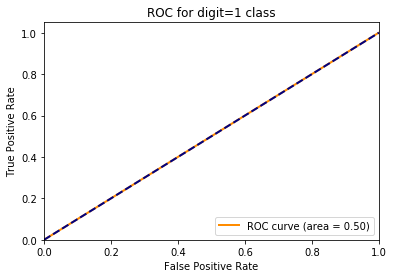

In [72]:

which_class =1
actuals, class_probabilities = test_class_probabilities(test_loader, which_class)

fpr, tpr, _ = roc_curve(actuals, class_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for digit=%d class' % which_class)
plt.legend(loc="lower right")
plt.show()